In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
file_path = "high_accuracy_fraud_detection_dataset.csv"  # Update the path if needed
df = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
  Transaction_ID  Transaction_Amount  Account_Age_Days  Account_Balance  \
0             T0             3197.49               132          7415.50   
1             T1              698.55               449          6766.99   
2             T2              435.61              1758           317.83   
3             T3             1164.07              2495           265.36   
4             T4             3249.77              2262          4195.20   

   Previous_Transactions_Avg_Amount  Is_Fraud  
0                            252.44         1  
1                            893.26         0  
2                            102.76         0  
3                            206.85         0  
4                            454.72         1  


In [4]:
# Feature selection
features = ["Transaction_Amount", "Account_Age_Days", "Account_Balance", "Previous_Transactions_Avg_Amount"]
X = df[features]
y = df["Is_Fraud"]

In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [7]:
# Make predictions
y_pred = logistic_model.predict(X_test)

In [8]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[187   1]
 [  0 112]]


In [9]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       188
           1       0.99      1.00      1.00       112

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.67%


<ipython-input-19-e38e84e8293f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Is_Fraud", data=df, palette="Set2")


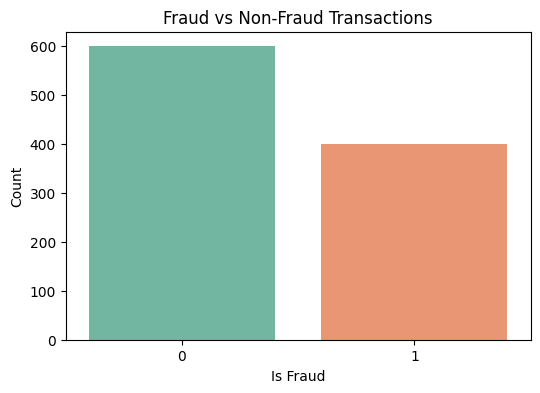

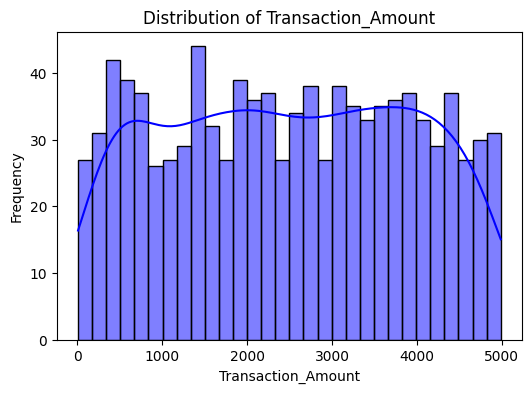

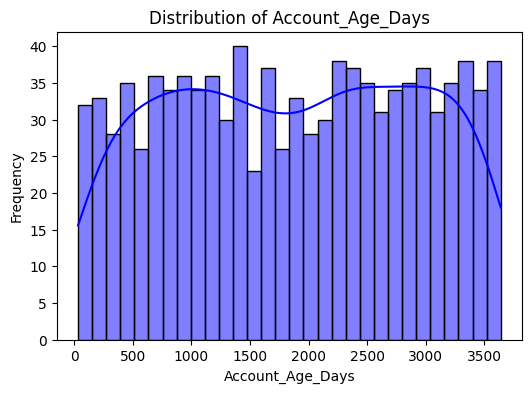

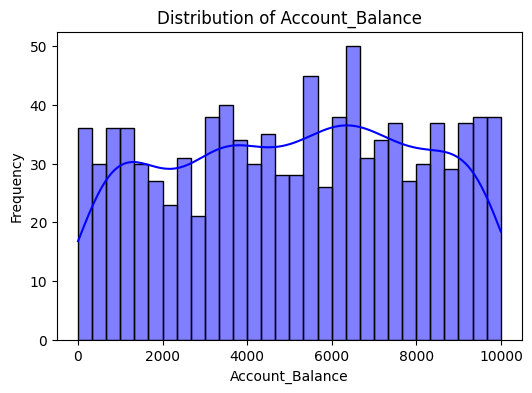

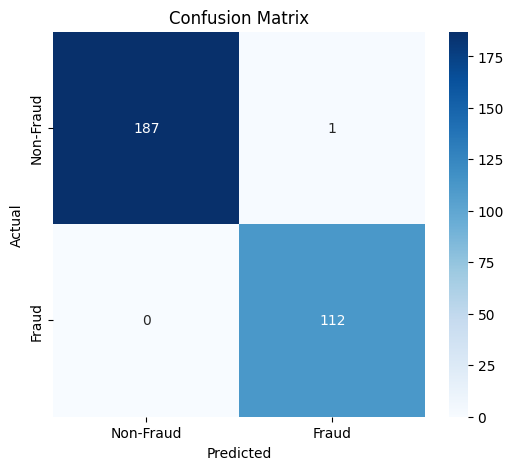

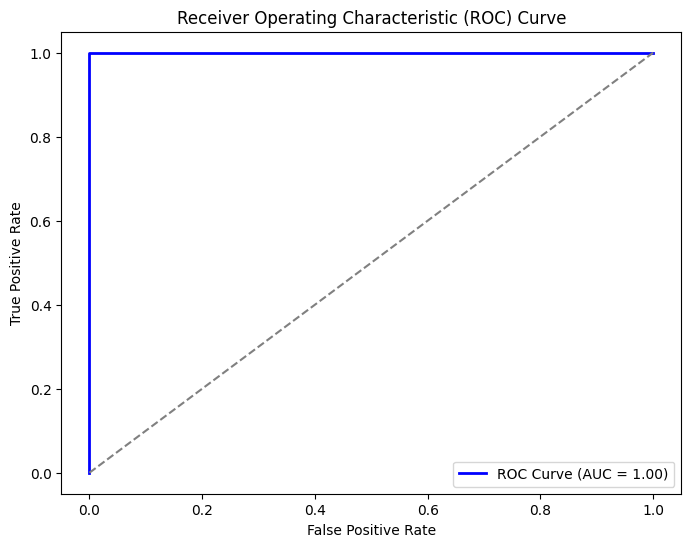

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load the dataset
file_path = "high_accuracy_fraud_detection_dataset.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Feature selection
features = ["Transaction_Amount", "Account_Age_Days", "Account_Balance", "Previous_Transactions_Avg_Amount"]
X = df[features]
y = df["Is_Fraud"]

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions and probabilities
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# 1. Distribution of Fraud vs Non-Fraud Transactions
plt.figure(figsize=(6, 4))
sns.countplot(x="Is_Fraud", data=df, palette="Set2")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()


# 3. Feature Distributions
features_to_plot = ["Transaction_Amount", "Account_Age_Days", "Account_Balance"]
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# 4. Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5. ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
